In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path=r'C:\Users\maheit\Downloads\supermarket_sales.csv'
df=pd.read_csv(path)

In [8]:
print("rows , columns : ",df.shape)
print(df.isnull())


rows , columns :  (1000, 17)
     Invoice ID  Branch   City  Customer type  Gender  Product line  \
0         False   False  False          False   False         False   
1         False   False  False          False   False         False   
2         False   False  False          False   False         False   
3         False   False  False          False   False         False   
4         False   False  False          False   False         False   
..          ...     ...    ...            ...     ...           ...   
995       False   False  False          False   False         False   
996       False   False  False          False   False         False   
997       False   False  False          False   False         False   
998       False   False  False          False   False         False   
999       False   False  False          False   False         False   

     Unit price  Quantity  Tax 5%  Total   Date   Time  Payment   cogs  \
0         False     False   False  False  Fa

In [9]:
sum=df['Total'].sum()
print(sum)

322966.749


In [15]:
branch_sales = df.groupby("Product line")['Total'].sum()
print(branch_sales)
print("highest:",branch_sales.idxmax())
print("lowest:",branch_sales.idxmin())

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64
highest: Food and beverages
lowest: Health and beauty


In [18]:
most_frequent_value = df["Product line"].mode()[0]
frequency_count = df["Product line"].value_counts().max()
print("most sold:",most_frequent_value,",occured:",frequency_count,"times")

most sold: Fashion accessories ,occured: 178 times


In [20]:
avg=df['Total'].mean()
print(avg)

322.966749


In [26]:
unique=df['Customer type'].unique()
print(unique.size)

2


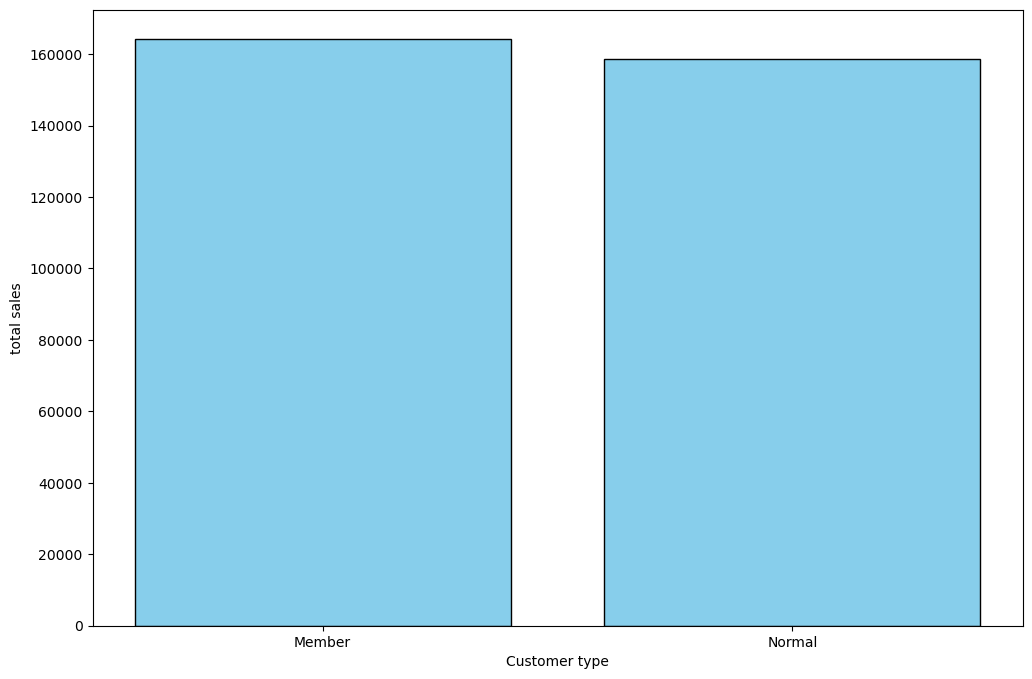

In [31]:
plt.figure(figsize=(12,8))
data=df.groupby("Customer type")['Total'].sum()
plt.bar(x=data.index,height=data, color='skyblue', edgecolor='black')
plt.xlabel("Customer type")
plt.ylabel("total sales")
plt.show()

In [ ]:
df['Date'] = df['Date'].replace('#####', np.nan)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')
df['Week'] = df['Date'].dt.to_period('w')
weekly_sales = df.groupby('Week')['Total'].sum()
print(monthly_sales.idxmax())

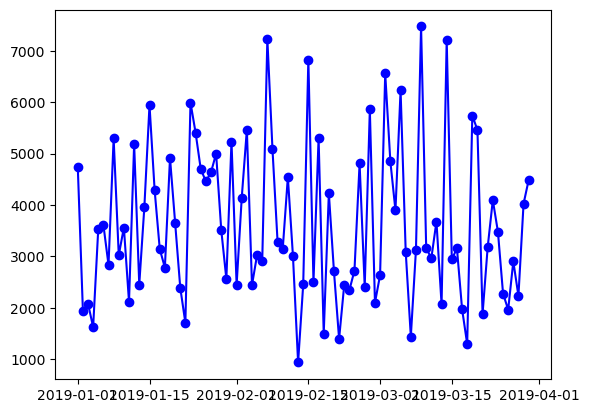

In [54]:
df['Date'] = df['Date'].replace('#####', np.nan)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')
df['Day']= df['Date'].dt.to_period('D')
y = df.groupby('Day')['Total'].sum()
x = y.index.to_timestamp()

plt.plot(x,y, marker='o', linestyle='-', color='blue', label='Line 1')

In [52]:
df['Date'] = df['Date'].replace('#####', np.nan)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total'].sum()
print(monthly_sales.idxmax())


2019-01


In [47]:
data=df.groupby("Customer type")['Rating'].mean()
print(data)

Customer type
Member    6.940319
Normal    7.005210
Name: Rating, dtype: float64


In [37]:
data=df.groupby("Payment")['Payment'].count()
print(data)
print("most preferred:",data.idxmax())

Payment
Cash           344
Credit card    311
Ewallet        345
Name: Payment, dtype: int64
most preferred: Ewallet


In [45]:
data=data=df.groupby("Product line")['Rating'].max()
print(data)
print(data.idxmax())


Product line
Electronic accessories    10.0
Fashion accessories        9.9
Food and beverages         9.9
Health and beauty         10.0
Home and lifestyle         9.9
Sports and travel         10.0
Name: Rating, dtype: float64
Electronic accessories


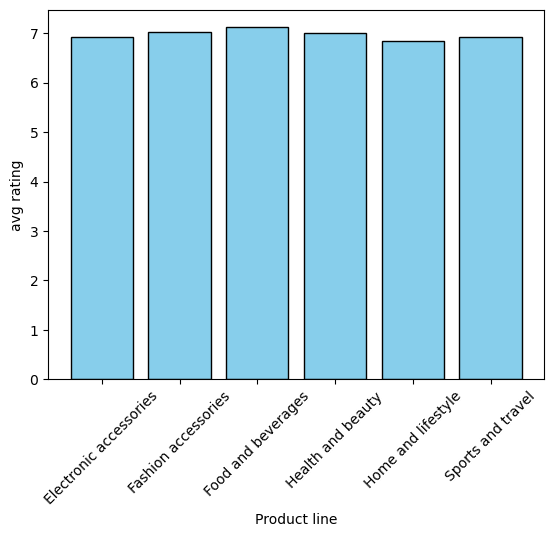

In [39]:
data=df.groupby("Product line")['Rating'].mean()
plt.bar(x=data.index,height=data, color='skyblue', edgecolor='black')
plt.xlabel("Product line")
plt.ylabel("avg rating")
plt.xticks(rotation=45)
plt.show()